### Stage 1. Study_Groups_Category.csv

The `Study_Groups_Category.csv` file provides demographic and contextual information about each study group involved in the research. Key columns include:
- **report_id** – Unique identifier for each report, allowing for data linkage across files.
- **study_id** – Unique identifier for each study within the reports.
- **s_country** – Country where the study was conducted, helping to assess the geographical scope of the data.
- **s_setting** – Describes the study setting (e.g., clinical, community), providing context on the environment where data was collected.
- **s_start** – Start date of the study, indicating when data collection began.
- **s_end** – End date of the study, showing the study’s overall duration.
- **s_duration** – Numeric duration of the study, giving a quick understanding of the study period.
- **s_n** – Number of participants in each group, essential for understanding the scale of each study.
- **s_diag** – General code for participants' diagnoses, which classifies medical conditions.
- **s_diag_spec** – Detailed description of diagnoses, offering a more precise medical context for the group.
- **diag_category** – Diagnosis category, providing an additional generalized classification, useful for analyzing large groups.
- **s_female** – Percentage of females in the group, supporting demographic analysis by gender.
- **s_age_mt** – Mean age of the treatment group, useful for assessing age distribution within this category.
- **s_age_mc** – Mean age of the control group, allowing for comparison of age characteristics.

These columns offer comprehensive information for analyzing study group characteristics, demographics, and diagnoses, providing deeper insight into the context of the data collected.

This file is crucial for assessing the diversity and characteristics of the study groups, enabling a deeper analysis of outcomes based on participant backgrounds.

### Exploring the Study Groups Category

Now, let’s get to know our study groups a bit better! We’ll start by downloading `Study_Groups_Category.csv`, which will give us insights into who participated in each study – their demographics, health conditions, and more. This information will help us understand the context and diversity of the participants involved.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [31]:
study_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\NEW_JOB\Pet Projects\Meditation_Stress_Project\Cleaned data\Study_Groups_Category.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

In [32]:
print(study_df.head(10))

   report_id  study_id      s_country  s_setting     s_start       s_end  \
0          1         1           Iran        1.0         NaN         NaN   
1          2         2            USA        3.0  09/08/2024  13/08/2024   
2          5         4            USA        1.0         NaN         NaN   
3          6         5  Great Britain        NaN         NaN         NaN   
4          7         6          China        1.0  05/01/2016  01/03/2017   
5          8         7  Great Britain        1.0  01/10/2008  31/12/2011   
6          9         8            USA        2.0  15/10/2015  30/06/2019   
7         10         9            USA        3.0  01/02/2012  31/12/2012   
8         11        10            USA        NaN         NaN         NaN   
9         12        11        Germany        NaN  07/01/2014  31/03/2019   

   s_duration    s_n  s_diag  \
0         NaN   30.0     2.0   
1         4.0  194.0     1.0   
2         NaN  124.0     2.0   
3         NaN   86.0     1.0   
4  

In [33]:
print(study_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   report_id      76 non-null     int64  
 1   study_id       76 non-null     int64  
 2   s_country      76 non-null     object 
 3   s_setting      73 non-null     float64
 4   s_start        59 non-null     object 
 5   s_end          49 non-null     object 
 6   s_duration     49 non-null     float64
 7   s_n            75 non-null     float64
 8   s_diag         75 non-null     float64
 9   s_diag_spec    75 non-null     object 
 10  diag_category  76 non-null     object 
 11  s_female       37 non-null     float64
 12  s_age_mt       21 non-null     object 
 13  s_age_mc       21 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 8.4+ KB
None


In [34]:
print(study_df.describe(include='all'))

        report_id   study_id s_country  s_setting     s_start       s_end  \
count   76.000000  76.000000        76  73.000000          59          49   
unique        NaN        NaN        14        NaN          52          44   
top           NaN        NaN       USA        NaN  01/10/2008  31/06/2014   
freq          NaN        NaN        39        NaN           2           3   
mean    45.000000  40.131579       NaN   1.369863         NaN         NaN   
std     24.511766  22.522488       NaN   0.935516         NaN         NaN   
min      1.000000   1.000000       NaN   1.000000         NaN         NaN   
25%     23.750000  20.750000       NaN   1.000000         NaN         NaN   
50%     46.500000  40.500000       NaN   1.000000         NaN         NaN   
75%     65.250000  59.250000       NaN   1.000000         NaN         NaN   
max     85.000000  78.000000       NaN   4.000000         NaN         NaN   

        s_duration         s_n     s_diag          s_diag_spec  \
count    

## Initial Data Exploration Summary

To get a sense of the data, we used three functions:

1. **Head**: Displayed the first few rows of the dataset to check the overall structure and data format.
2. **Describe**: Provided summary statistics, including mean, min, max, and counts, to understand numerical and categorical distributions.
3. **Info**: Displayed information about data types, non-null counts, and memory usage, helping us assess the quality and completeness of the data.

- **First Peek**: The file gives us a snapshot of the study groups with fields like `report_id`, `study_id`, `s_country`, `s_diag`, and demographics such as `s_female` and age information.
- **Descriptive Stats**:
  - **Country**: Studies span 14 countries, with the U.S. as the most frequent location.
  - **Sample Sizes** (`s_n`): Ranges significantly from 22 to 485 participants per group.
  - **Age and Gender**: Not all age or gender data is complete, but the mean age for available records centers around 43 years and 62% of female.
  - **Duration**: From several weeks to 6 years
  - **Most popular diagnosis**: Depressive disorder
- **Data Structure**:
  - The dataset has 76 entries across 14 columns.
  - Certain columns, like `s_start`, `s_end`, `s_duration`, and `s_female`, contain missing values that may require cleaning.

### Next Steps:
1. **Address Missing Data**: We’ll handle missing values in `s_female`, `s_age_mt`, `s_age_mc`, and date fields.
2. **Standardize Date Fields**: Convert `s_start` and `s_end` to a consistent date format.
3. **Prepare for Analysis**: Ensure categorical columns, such as `s_country` and `diag_category`, are standardized for easier analysis.

## Observing Missing Data

Let’s take a closer look at the gaps in our data. The heatmap reveals:

- **Concentrated Gaps**: Key columns like `s_female`, `s_age_mt`, and `s_age_mc` show noticeable missing values, suggesting demographic data may need filling.
- **Date Gaps**: Some studies lack start (`s_start`) and end (`s_end`) dates, indicating potential gaps in timeline data.

This snapshot gives us direction on where to focus next to keep our analysis accurate and comprehensive.

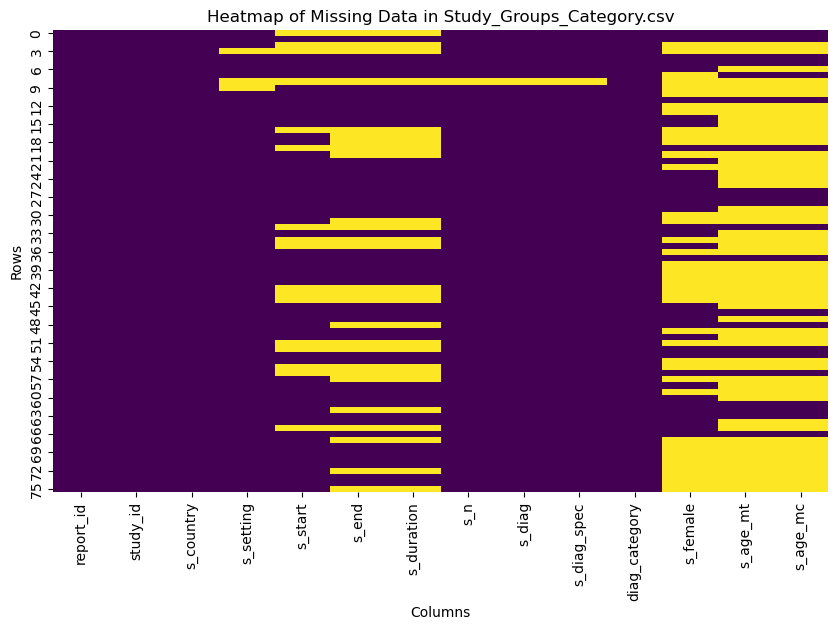

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(study_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data in Study_Groups_Category.csv")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [36]:
study_df['s_start'] = pd.to_datetime(study_df['s_start'], format='%d/%m/%Y', errors='coerce')
study_df['s_end'] = pd.to_datetime(study_df['s_end'], format='%d/%m/%Y', errors='coerce')

In [37]:
study_df['study_duration_days'] = (study_df['s_end'] - study_df['s_start']).dt.days

# Обчислення мінімальної, максимальної і середньої тривалості
min_duration = study_df['study_duration_days'].min()
max_duration = study_df['study_duration_days'].max()
mean_duration = study_df['study_duration_days'].mean()

# Виділення року з колонки S-START
study_df['start_year'] = study_df['s_start'].dt.year

# Підрахунок кількості досліджень по роках
year_counts = study_df['start_year'].value_counts()

# Знаходження року(ів) з максимальною кількістю досліджень
max_years = year_counts[year_counts == year_counts.max()]

# Створення тексту для легенди
max_years_text = ", ".join(f"{int(year)} ({int(count)} досліджень)" for year, count in max_years.items())

# Сортування за датою початку
study_df = study_df.sort_values(by='s_start').reset_index(drop=True)

In [39]:
study_df[['study_id','s_start', 's_end', 'study_duration_days']].head(5)

,study_id,s_start,s_end,study_duration_days
0,66,2006-09-01,2007-10-31,425.0
1,73,2007-07-06,2010-01-11,920.0
2,14,2007-10-01,2010-12-31,1187.0
3,43,2008-01-01,2011-01-31,1126.0
4,40,2008-03-01,NaT,NaN


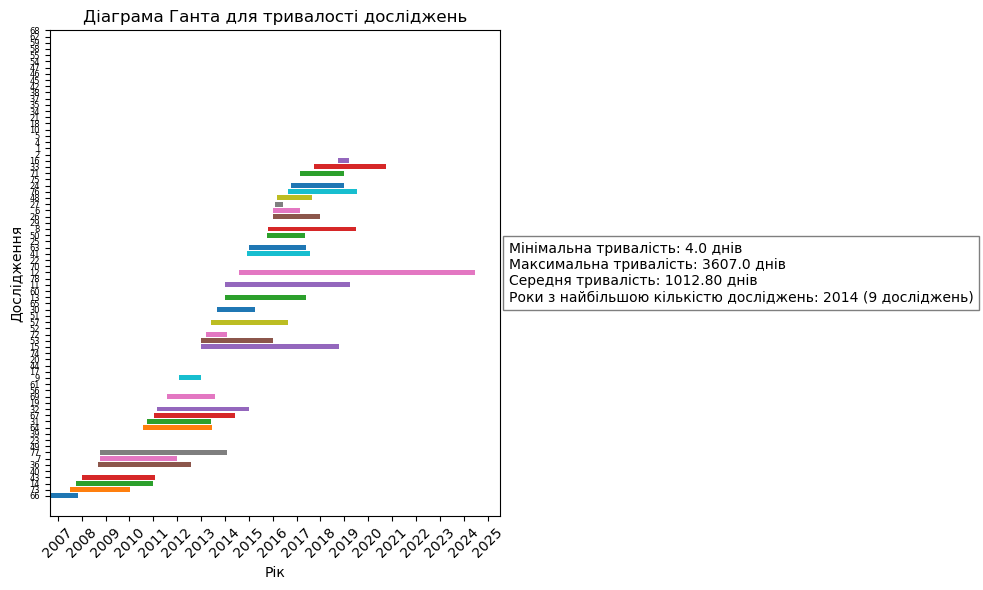

In [40]:
# Створення діаграми Ганта
fig, ax = plt.subplots(figsize=(10, 6))

# Відображення кожного дослідження як горизонтальної смуги
for i, (s_start, study_duration_days) in enumerate(zip(study_df['s_start'], study_df['study_duration_days'])):
    plt.barh(i, study_duration_days, left=s_start)

# Налаштування осі Y
ax.set_yticks(range(len(study_df)))
ax.set_yticklabels(study_df['study_id'], fontsize=6)  # Зменшення розміру шрифту для міток

# Форматування осі X для відображення тільки років
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Додаємо підписи
plt.xlabel('Рік')
plt.ylabel('Дослідження')
plt.title('Діаграма Ганта для тривалості досліджень')

# Додавання легенди з інформацією про роки з найбільшою кількістю досліджень
legend_text = (
    f"Мінімальна тривалість: {min_duration} днів\n"
    f"Максимальна тривалість: {max_duration} днів\n"
    f"Середня тривалість: {mean_duration:.2f} днів\n"
    f"Роки з найбільшою кількістю досліджень: {max_years_text}"
)
plt.text(1.02, 0.5, legend_text, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Поворот міток на осі X для кращого вигляду
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()